# Handling zeros in features
- Drop rows with zero features

# KIA 10 Y
- period
    - 2009-03-23 ~ 2018-05-30
- features
    - ['a0', 'a1', 'b0', 'tau']\('k', 'fitN'\)
    - 40 features to represent oneday dynamics
> - $a_0 (k)$ : a0k01 ~ a0k10
> - $a_1 (k)$ : a1k01 ~ a1k10
> - $b_0 (k)$ : b0k01 ~ b0k10
> - $\tau(k)$ : tau01 ~ tau10

- targets
    - 5 targets to show the change in prices
> - 'C1O1',	'C2O1',	'O2C1',	'C2C1',	'C2O2'

## Load data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
# Load ddata with features (40) and targets (5)

filename = 'kia_features_targets.csv'
df = pd.read_csv(filename)  

In [29]:
df.shape # 2276 market-open days for 10 years; prices, features, targets

(2276, 52)

In [30]:
df.head()

,Date,Open,High,Low,Close,Volume,Change,a0k01,a0k02,a0k03,a0k04,a0k05,a0k06,a0k07,a0k08,a0k09,a0k10,a1k01,a1k02,a1k03,a1k04,a1k05,a1k06,a1k07,a1k08,a1k09,a1k10,b0k01,b0k02,b0k03,b0k04,b0k05,b0k06,b0k07,b0k08,b0k09,b0k10,tauk01,tauk02,tauk03,tauk04,tauk05,tauk06,tauk07,tauk08,tauk09,tauk10,C1O1,C2O1,O2C1,C2C1,C2O2
0,2009-03-23,7850,8120,7800,8080,8344058,0.049351,-2.727038,-3.703672,-3.933671,-4.360880,-3.669309,-3.317302,-3.789300,-2.920232,-2.455292,-2.013126,0.001550,0.001828,0.002574,0.002469,0.001936,0.001605,0.001868,0.001748,0.001631,0.001319,2.984912,3.313493,4.407811,4.251816,3.896841,3.441775,3.772554,3.582601,3.674260,3.246674,1461.122,1499.507,1292.837,1329.968,1547.975,1681.609,1597.517,1526.722,1628.337,1772.121,1,1,1,1,0
1,2009-03-24,8240,8260,8010,8180,6652120,0.012376,-3.122411,-3.348649,-2.933583,-2.821247,-3.108235,-2.540054,-2.970022,-2.841218,-2.774238,-3.082254,0.001416,0.001648,0.001455,0.001291,0.001519,0.001233,0.001463,0.001439,0.001329,0.001453,3.726610,3.733350,3.459047,3.197817,3.748140,3.000958,3.505756,3.389110,3.433971,3.807786,2029.949,1743.483,1813.185,1923.603,1887.045,1857.774,1832.649,1788.894,1965.954,2001.118,0,0,0,0,0
2,2009-03-25,8120,8180,7970,8100,5107740,-0.009780,-3.880331,-4.056443,-3.193778,-3.189689,-2.891290,-2.845863,-3.229054,-2.707997,-2.366482,-2.419309,0.001894,0.002004,0.001549,0.001557,0.001381,0.001586,0.001585,0.001478,0.001334,0.001385,4.632692,4.571159,3.624464,3.840120,3.534951,3.847850,3.906032,3.480426,3.133456,3.330892,1886.318,1752.629,1803.177,1882.571,1949.354,1796.506,1879.283,1756.918,1745.643,1774.590,0,1,1,1,1
3,2009-03-26,8170,8480,8110,8420,13682048,0.039506,-1.300494,-1.856442,-3.267227,-2.730512,-2.687609,-3.435165,-3.552223,-3.506665,-2.362029,-2.341256,0.000936,0.001350,0.001954,0.001735,0.001793,0.002152,0.002307,0.002367,0.001762,0.001711,2.184273,2.576021,3.417829,3.402454,3.396926,3.455015,3.743746,3.993577,3.052707,3.019495,1727.351,1429.803,1353.847,1441.596,1385.083,1231.359,1213.075,1248.435,1258.803,1283.662,1,1,1,1,0
4,2009-03-27,8570,9070,8470,8490,16489312,0.008314,-2.174669,-1.067556,-1.521173,-1.520366,-2.777781,-1.884196,0.008117,-1.528813,-1.225869,-1.279469,0.001369,0.000632,0.000701,0.000760,0.001281,0.001095,0.000298,0.000988,0.000767,0.000762,2.176573,2.159975,2.257061,2.608248,4.072698,2.605460,1.016953,2.209636,2.228379,2.235360,1671.920,2664.374,2552.312,2545.264,2374.108,1899.040,3208.407,1663.462,2103.401,2129.005,0,0,1,0,0


In [31]:
df.tail()

,Date,Open,High,Low,Close,Volume,Change,a0k01,a0k02,a0k03,a0k04,a0k05,a0k06,a0k07,a0k08,a0k09,a0k10,a1k01,a1k02,a1k03,a1k04,a1k05,a1k06,a1k07,a1k08,a1k09,a1k10,b0k01,b0k02,b0k03,b0k04,b0k05,b0k06,b0k07,b0k08,b0k09,b0k10,tauk01,tauk02,tauk03,tauk04,tauk05,tauk06,tauk07,tauk08,tauk09,tauk10,C1O1,C2O1,O2C1,C2C1,C2O2
2271,2018-05-24,33450,33450,32100,32700,1750711,-0.028232,-0.585490,-0.625853,-0.543544,-0.584065,-0.422708,-0.465191,-0.388827,-0.347194,-0.433477,-0.465209,0.000030,0.000048,0.000027,0.000029,0.000022,0.000024,0.000020,0.000018,0.000022,0.000027,1.089124,1.189908,0.995531,1.051124,0.773495,0.826473,0.735872,0.671599,0.782948,0.881172,27592.76,23938.41,28550.39,27705.77,27346.57,26530.38,28559.45,30225.58,26938.09,25252.68,0,0,0,0,0
2272,2018-05-25,32550,32750,32000,32250,796582,-0.013761,-0.394717,-0.544352,-0.515983,-0.424708,-0.521054,-0.448672,-0.390368,-0.389287,-0.253047,-0.404310,0.000021,0.000030,0.000028,0.000028,0.000053,0.000024,0.000022,0.000021,0.000075,0.000021,0.698212,0.940178,0.946924,0.676377,0.651801,0.795965,0.704167,0.648718,0.577611,0.662864,25118.36,24177.87,25822.77,21860.54,20519.80,25938.52,25275.38,24235.08,11276.32,24566.47,0,0,1,1,0
2273,2018-05-28,32450,32500,31900,32300,721091,0.001550,0.000000,-1.051603,-0.564302,-0.621620,-0.872420,-0.663673,-0.479929,-0.511283,-0.438250,-0.409523,0.000000,0.000187,0.000032,0.000033,0.000045,0.000035,0.000025,0.000025,0.000027,0.000021,0.000000,1.013802,0.973305,1.089854,1.228225,1.079917,0.873741,0.829169,0.776875,0.746302,0.00,23944.48,24380.62,25779.98,22340.07,24330.83,26612.55,26190.91,24455.42,26901.06,0,0,0,0,0
2274,2018-05-29,32250,32400,31600,31650,896720,-0.020124,-0.653615,-0.432038,-0.545447,-0.382949,-0.557077,-0.430326,-0.428662,-0.422854,-0.355154,-0.281713,0.000034,0.000047,0.000034,0.000019,0.000030,0.000023,0.000023,0.000022,0.000018,0.000014,1.352913,0.836114,0.903707,0.623943,0.809665,0.754945,0.772416,0.739222,0.623434,0.510985,29970.86,19545.98,22231.27,25134.90,22010.64,25308.13,26093.22,26054.51,26200.00,26692.99,0,0,0,1,1
2275,2018-05-30,31450,31950,31400,31700,885930,0.001580,-0.909242,-0.717859,-0.663725,-0.557721,-0.586936,-0.619580,-0.557049,-0.595521,-0.570060,-0.619659,0.000047,0.000038,0.000034,0.000030,0.000031,0.000034,0.000030,0.000031,0.000030,0.000033,1.630237,1.179362,1.184611,0.946422,1.003503,1.086507,0.952689,1.025429,0.986699,1.065320,26317.73,24196.48,27001.12,24538.75,25239.68,24645.88,24562.41,24977.92,25263.94,24705.70,1,0,1,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2276 non-null   object 
 1   Open    2276 non-null   int64  
 2   High    2276 non-null   int64  
 3   Low     2276 non-null   int64  
 4   Close   2276 non-null   int64  
 5   Volume  2276 non-null   int64  
 6   Change  2276 non-null   float64
 7   a0k01   2276 non-null   float64
 8   a0k02   2276 non-null   float64
 9   a0k03   2276 non-null   float64
 10  a0k04   2276 non-null   float64
 11  a0k05   2276 non-null   float64
 12  a0k06   2276 non-null   float64
 13  a0k07   2276 non-null   float64
 14  a0k08   2276 non-null   float64
 15  a0k09   2276 non-null   float64
 16  a0k10   2276 non-null   float64
 17  a1k01   2276 non-null   float64
 18  a1k02   2276 non-null   float64
 19  a1k03   2276 non-null   float64
 20  a1k04   2276 non-null   float64
 21  a1k05   2276 non-null   float64
 22  

In [33]:
(df==0).sum(axis=1)

0       1
1       5
2       1
3       1
4       4
       ..
2271    5
2272    3
2273    9
2274    3
2275    3
Length: 2276, dtype: int64

## Check zeros

In [34]:
# check zeros
print(df[df==0])



     Date  Open  High  Low  Close  Volume  ...  tauk10  C1O1  C2O1  O2C1  C2C1  C2O2
0     NaN   NaN   NaN  NaN    NaN     NaN  ...     NaN   NaN   NaN   NaN   NaN   0.0
1     NaN   NaN   NaN  NaN    NaN     NaN  ...     NaN   0.0   0.0   0.0   0.0   0.0
2     NaN   NaN   NaN  NaN    NaN     NaN  ...     NaN   0.0   NaN   NaN   NaN   NaN
3     NaN   NaN   NaN  NaN    NaN     NaN  ...     NaN   NaN   NaN   NaN   NaN   0.0
4     NaN   NaN   NaN  NaN    NaN     NaN  ...     NaN   0.0   0.0   NaN   0.0   0.0
...   ...   ...   ...  ...    ...     ...  ...     ...   ...   ...   ...   ...   ...
2271  NaN   NaN   NaN  NaN    NaN     NaN  ...     NaN   0.0   0.0   0.0   0.0   0.0
2272  NaN   NaN   NaN  NaN    NaN     NaN  ...     NaN   0.0   0.0   NaN   NaN   0.0
2273  NaN   NaN   NaN  NaN    NaN     NaN  ...     NaN   0.0   0.0   0.0   0.0   0.0
2274  NaN   NaN   NaN  NaN    NaN     NaN  ...     NaN   0.0   0.0   0.0   NaN   NaN
2275  NaN   NaN   NaN  NaN    NaN     NaN  ...     NaN   NaN   0.

In [35]:
df.iloc[:,7:47].shape

(2276, 40)

In [36]:
# np.argwhere(arr == 0)
zero_arr = np.argwhere(df.iloc[:,7:47].values == 0)
zero_arr.shape  # 248 = 62*4

(248, 2)

In [37]:
print(zero_arr, end=" ")

[[  52    6]
 [  52    9]
 [  52   16]
 [  52   19]
 [  52   26]
 [  52   29]
 [  52   36]
 [  52   39]
 [  68    9]
 [  68   19]
 [  68   29]
 [  68   39]
 [  74    1]
 [  74   11]
 [  74   21]
 [  74   31]
 [  97    7]
 [  97   17]
 [  97   27]
 [  97   37]
 [ 127    8]
 [ 127   18]
 [ 127   28]
 [ 127   38]
 [ 157    1]
 [ 157   11]
 [ 157   21]
 [ 157   31]
 [ 190    0]
 [ 190   10]
 [ 190   20]
 [ 190   30]
 [ 196    3]
 [ 196   13]
 [ 196   23]
 [ 196   33]
 [ 321    0]
 [ 321   10]
 [ 321   20]
 [ 321   30]
 [ 339    0]
 [ 339    2]
 [ 339    3]
 [ 339   10]
 [ 339   12]
 [ 339   13]
 [ 339   20]
 [ 339   22]
 [ 339   23]
 [ 339   30]
 [ 339   32]
 [ 339   33]
 [ 409    0]
 [ 409   10]
 [ 409   20]
 [ 409   30]
 [ 457    3]
 [ 457    6]
 [ 457    7]
 [ 457    8]
 [ 457    9]
 [ 457   13]
 [ 457   16]
 [ 457   17]
 [ 457   18]
 [ 457   19]
 [ 457   23]
 [ 457   26]
 [ 457   27]
 [ 457   28]
 [ 457   29]
 [ 457   33]
 [ 457   36]
 [ 457   37]
 [ 457   38]
 [ 457   39]
 [ 461    1]

In [38]:
print(np.unique(zero_arr[:,0]))
len(np.unique(zero_arr[:,0]))

[  52   68   74   97  127  157  190  196  321  339  409  457  461  534
  588  614  619  621  687  856  882  988 1071 1099 1284 1313 1366 1418
 1434 1480 1556 1582 1601 1697 1753 1768 1827 1866 1875 1881 1916 1943
 2011 2049 2101 2273]


46

In [39]:
rows_zero = np.unique(zero_arr[:,0])
rows_zero.shape

(46,)

In [40]:
df_nozero = df.drop(df.index[rows_zero]) #, inplace=True)#, axis=0)
df_nozero.shape

(2230, 52)

In [ ]:
# Code hint
# df = df.replace(0, np.nan)
# df = df.drop(rows_zero, inplace=True) # axis=0)
# df = df.replace(np.nan, 0)

# df[(df.sum(axis=1) != 0)]       # 30% faster 
# df[df.values.sum(axis=1) != 0]  # 3X faster 

# all_zero_mask=(df != 0).any(axis=1) # Is there anything in this row non-zero?
# df.loc[all_zero_mask,:].shape

# new_df = df[df.loc[:]!=0].dropna()

# df.loc[:, (df!=0).any(axis=0)]

# new_df = df[df.loc[:]!=0].dropna()

In [45]:
df_nozero.head()

,Date,Open,High,Low,Close,Volume,Change,a0k01,a0k02,a0k03,a0k04,a0k05,a0k06,a0k07,a0k08,a0k09,a0k10,a1k01,a1k02,a1k03,a1k04,a1k05,a1k06,a1k07,a1k08,a1k09,a1k10,b0k01,b0k02,b0k03,b0k04,b0k05,b0k06,b0k07,b0k08,b0k09,b0k10,tauk01,tauk02,tauk03,tauk04,tauk05,tauk06,tauk07,tauk08,tauk09,tauk10,C1O1,C2O1,O2C1,C2C1,C2O2
0,2009-03-23,7850,8120,7800,8080,8344058,0.049351,-2.727038,-3.703672,-3.933671,-4.360880,-3.669309,-3.317302,-3.789300,-2.920232,-2.455292,-2.013126,0.001550,0.001828,0.002574,0.002469,0.001936,0.001605,0.001868,0.001748,0.001631,0.001319,2.984912,3.313493,4.407811,4.251816,3.896841,3.441775,3.772554,3.582601,3.674260,3.246674,1461.122,1499.507,1292.837,1329.968,1547.975,1681.609,1597.517,1526.722,1628.337,1772.121,1,1,1,1,0
1,2009-03-24,8240,8260,8010,8180,6652120,0.012376,-3.122411,-3.348649,-2.933583,-2.821247,-3.108235,-2.540054,-2.970022,-2.841218,-2.774238,-3.082254,0.001416,0.001648,0.001455,0.001291,0.001519,0.001233,0.001463,0.001439,0.001329,0.001453,3.726610,3.733350,3.459047,3.197817,3.748140,3.000958,3.505756,3.389110,3.433971,3.807786,2029.949,1743.483,1813.185,1923.603,1887.045,1857.774,1832.649,1788.894,1965.954,2001.118,0,0,0,0,0
2,2009-03-25,8120,8180,7970,8100,5107740,-0.009780,-3.880331,-4.056443,-3.193778,-3.189689,-2.891290,-2.845863,-3.229054,-2.707997,-2.366482,-2.419309,0.001894,0.002004,0.001549,0.001557,0.001381,0.001586,0.001585,0.001478,0.001334,0.001385,4.632692,4.571159,3.624464,3.840120,3.534951,3.847850,3.906032,3.480426,3.133456,3.330892,1886.318,1752.629,1803.177,1882.571,1949.354,1796.506,1879.283,1756.918,1745.643,1774.590,0,1,1,1,1
3,2009-03-26,8170,8480,8110,8420,13682048,0.039506,-1.300494,-1.856442,-3.267227,-2.730512,-2.687609,-3.435165,-3.552223,-3.506665,-2.362029,-2.341256,0.000936,0.001350,0.001954,0.001735,0.001793,0.002152,0.002307,0.002367,0.001762,0.001711,2.184273,2.576021,3.417829,3.402454,3.396926,3.455015,3.743746,3.993577,3.052707,3.019495,1727.351,1429.803,1353.847,1441.596,1385.083,1231.359,1213.075,1248.435,1258.803,1283.662,1,1,1,1,0
4,2009-03-27,8570,9070,8470,8490,16489312,0.008314,-2.174669,-1.067556,-1.521173,-1.520366,-2.777781,-1.884196,0.008117,-1.528813,-1.225869,-1.279469,0.001369,0.000632,0.000701,0.000760,0.001281,0.001095,0.000298,0.000988,0.000767,0.000762,2.176573,2.159975,2.257061,2.608248,4.072698,2.605460,1.016953,2.209636,2.228379,2.235360,1671.920,2664.374,2552.312,2545.264,2374.108,1899.040,3208.407,1663.462,2103.401,2129.005,0,0,1,0,0


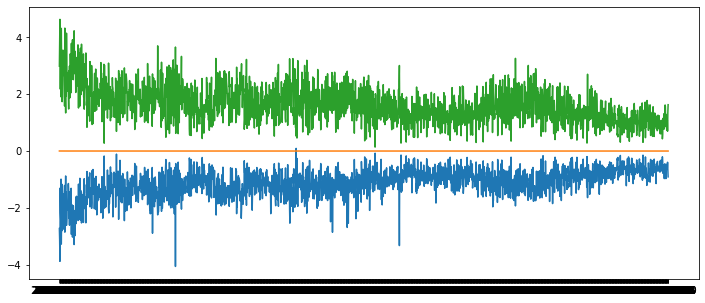

In [42]:
plt.figure(figsize=(12,5))
plt.plot(df_nozero['Date'],df_nozero['a0k01'])
plt.plot(df_nozero['Date'],df_nozero['a1k01'])
plt.plot(df_nozero['Date'],df_nozero['b0k01'])
plt.show()

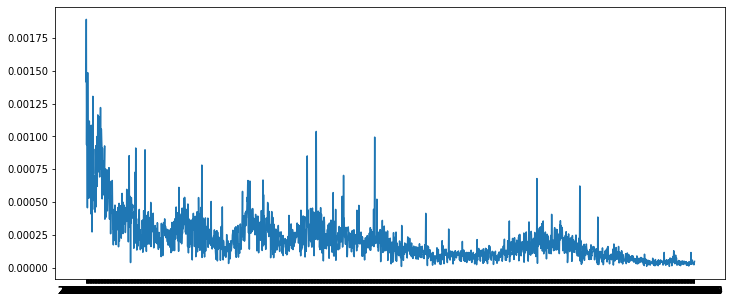

In [44]:
plt.figure(figsize=(12,5))
# plt.plot(df_nozero['Date'],df_nozero['a0k01'])
plt.plot(df_nozero['Date'],df_nozero['a1k01'])
# plt.plot(df_nozero['Date'],df_nozero['b0k01'])
plt.show()

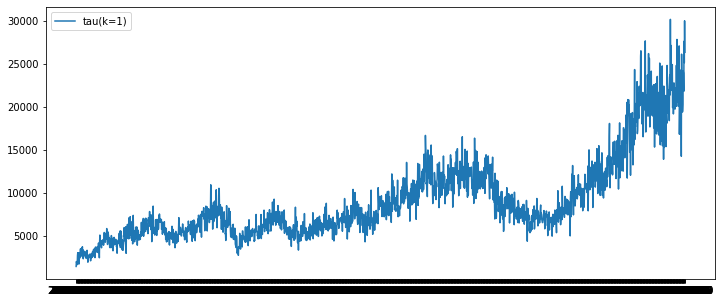

In [43]:
plt.figure(figsize=(12,5))
plt.plot(df_nozero['Date'],df_nozero['tauk01'])
plt.legend(['tau(k=1)'])
plt.show()

## ML model without features with zeros

##targets
- 'C1O1',	'C2O1',	'O2C1',	'C2C1',	'C2O2'

In [46]:
target_columns = ['C1O1','C2O1','O2C1','C2C1','C2O2']

In [47]:
targets_count = []
for target in target_columns:
    cnt = list(df_nozero[target].value_counts())
    targets_count.append(cnt)

targets_count

[[1217, 1013], [1151, 1079], [1115, 1115], [1157, 1073], [1213, 1017]]

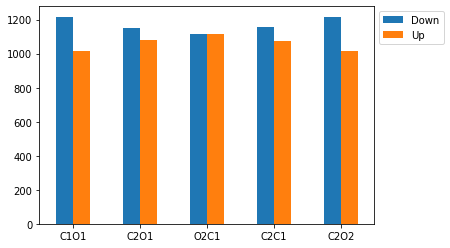

In [48]:
index = np.arange(len(target_columns))
df_target = pd.DataFrame(np.array(targets_count))
df_target.plot.bar()
plt.xticks(index,target_columns, rotation=0)
plt.legend(['Down','Up'], bbox_to_anchor=(1., 1))
plt.show()

### 머신러닝 목표
- 하루의 동역학(40개의 특성)이 무엇을 예측할 수 있는가?
    - 'C1O1', 'C2O1', 'O2C1', 'C2C1', 'C2O2'

- 특성값이 0인 row 제외하고 데이터 구성
    - 46개의 특성값이 0인 row 제외
    - 특성값 0 -> 결정안된 동역학
    


In [49]:
# make feature(40) + target('O2C1')
df_dataset01_arr = df_nozero.iloc[:,7:47].values
df_dataset01_arr.shape

(2230, 40)

In [50]:
df_target01_arr = df_nozero.iloc[:,49].values   # 'O2C1'
df_target01_arr.shape

(2230,)

In [51]:
df_target01_arr = df_target01_arr[:,np.newaxis]
df_target01_arr.shape

(2230, 1)

In [52]:
# np.concatenate((first, second), axis=1)
# df_target01_arr = df_target01_arr[:,np.newaxis]
df_dataset = np.concatenate((df_dataset01_arr, df_target01_arr), axis=1)
df_dataset.shape

(2230, 41)

In [53]:
print(list(df.columns[7:47])+list(['O2C1']))

['a0k01', 'a0k02', 'a0k03', 'a0k04', 'a0k05', 'a0k06', 'a0k07', 'a0k08', 'a0k09', 'a0k10', 'a1k01', 'a1k02', 'a1k03', 'a1k04', 'a1k05', 'a1k06', 'a1k07', 'a1k08', 'a1k09', 'a1k10', 'b0k01', 'b0k02', 'b0k03', 'b0k04', 'b0k05', 'b0k06', 'b0k07', 'b0k08', 'b0k09', 'b0k10', 'tauk01', 'tauk02', 'tauk03', 'tauk04', 'tauk05', 'tauk06', 'tauk07', 'tauk08', 'tauk09', 'tauk10', 'O2C1']


In [54]:
df_dataset = pd.DataFrame(df_dataset, columns=list(df.columns[7:47])+list(['O2C1'])) #, inplace=True)
df_dataset.shape,df_dataset.head()

((2230, 41),
       a0k01     a0k02     a0k03     a0k04  ...    tauk08    tauk09    tauk10  O2C1
 0 -2.727038 -3.703672 -3.933671 -4.360880  ...  1526.722  1628.337  1772.121   1.0
 1 -3.122411 -3.348649 -2.933583 -2.821247  ...  1788.894  1965.954  2001.118   0.0
 2 -3.880331 -4.056443 -3.193778 -3.189689  ...  1756.918  1745.643  1774.590   1.0
 3 -1.300494 -1.856442 -3.267227 -2.730512  ...  1248.435  1258.803  1283.662   1.0
 4 -2.174669 -1.067556 -1.521173 -1.520366  ...  1663.462  2103.401  2129.005   1.0
 
 [5 rows x 41 columns])

In [56]:
# df = df.astype({"a": int, "b": complex})
df_dataset = df_dataset.astype({'O2C1': int})
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a0k01   2230 non-null   float64
 1   a0k02   2230 non-null   float64
 2   a0k03   2230 non-null   float64
 3   a0k04   2230 non-null   float64
 4   a0k05   2230 non-null   float64
 5   a0k06   2230 non-null   float64
 6   a0k07   2230 non-null   float64
 7   a0k08   2230 non-null   float64
 8   a0k09   2230 non-null   float64
 9   a0k10   2230 non-null   float64
 10  a1k01   2230 non-null   float64
 11  a1k02   2230 non-null   float64
 12  a1k03   2230 non-null   float64
 13  a1k04   2230 non-null   float64
 14  a1k05   2230 non-null   float64
 15  a1k06   2230 non-null   float64
 16  a1k07   2230 non-null   float64
 17  a1k08   2230 non-null   float64
 18  a1k09   2230 non-null   float64
 19  a1k10   2230 non-null   float64
 20  b0k01   2230 non-null   float64
 21  b0k02   2230 non-null   float64
 22  

In [57]:
df_dataset.head()

,a0k01,a0k02,a0k03,a0k04,a0k05,a0k06,a0k07,a0k08,a0k09,a0k10,a1k01,a1k02,a1k03,a1k04,a1k05,a1k06,a1k07,a1k08,a1k09,a1k10,b0k01,b0k02,b0k03,b0k04,b0k05,b0k06,b0k07,b0k08,b0k09,b0k10,tauk01,tauk02,tauk03,tauk04,tauk05,tauk06,tauk07,tauk08,tauk09,tauk10,O2C1
0,-2.727038,-3.703672,-3.933671,-4.360880,-3.669309,-3.317302,-3.789300,-2.920232,-2.455292,-2.013126,0.001550,0.001828,0.002574,0.002469,0.001936,0.001605,0.001868,0.001748,0.001631,0.001319,2.984912,3.313493,4.407811,4.251816,3.896841,3.441775,3.772554,3.582601,3.674260,3.246674,1461.122,1499.507,1292.837,1329.968,1547.975,1681.609,1597.517,1526.722,1628.337,1772.121,1
1,-3.122411,-3.348649,-2.933583,-2.821247,-3.108235,-2.540054,-2.970022,-2.841218,-2.774238,-3.082254,0.001416,0.001648,0.001455,0.001291,0.001519,0.001233,0.001463,0.001439,0.001329,0.001453,3.726610,3.733350,3.459047,3.197817,3.748140,3.000958,3.505756,3.389110,3.433971,3.807786,2029.949,1743.483,1813.185,1923.603,1887.045,1857.774,1832.649,1788.894,1965.954,2001.118,0
2,-3.880331,-4.056443,-3.193778,-3.189689,-2.891290,-2.845863,-3.229054,-2.707997,-2.366482,-2.419309,0.001894,0.002004,0.001549,0.001557,0.001381,0.001586,0.001585,0.001478,0.001334,0.001385,4.632692,4.571159,3.624464,3.840120,3.534951,3.847850,3.906032,3.480426,3.133456,3.330892,1886.318,1752.629,1803.177,1882.571,1949.354,1796.506,1879.283,1756.918,1745.643,1774.590,1
3,-1.300494,-1.856442,-3.267227,-2.730512,-2.687609,-3.435165,-3.552223,-3.506665,-2.362029,-2.341256,0.000936,0.001350,0.001954,0.001735,0.001793,0.002152,0.002307,0.002367,0.001762,0.001711,2.184273,2.576021,3.417829,3.402454,3.396926,3.455015,3.743746,3.993577,3.052707,3.019495,1727.351,1429.803,1353.847,1441.596,1385.083,1231.359,1213.075,1248.435,1258.803,1283.662,1
4,-2.174669,-1.067556,-1.521173,-1.520366,-2.777781,-1.884196,0.008117,-1.528813,-1.225869,-1.279469,0.001369,0.000632,0.000701,0.000760,0.001281,0.001095,0.000298,0.000988,0.000767,0.000762,2.176573,2.159975,2.257061,2.608248,4.072698,2.605460,1.016953,2.209636,2.228379,2.235360,1671.920,2664.374,2552.312,2545.264,2374.108,1899.040,3208.407,1663.462,2103.401,2129.005,1


# pycaret

In [58]:
!pip install pycaret

     |████████████████████████████████| 266kB 4.1MB/s 
     |████████████████████████████████| 6.8MB 7.1MB/s 
     |████████████████████████████████| 1.4MB 42.0MB/s 
     |████████████████████████████████| 14.4MB 196kB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 1.7MB 36.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 174kB 49.5MB/s 
     |████████████████████████████████| 2.0MB 36.3MB/s 
     |████████████████████████████████| 112kB 32.8MB/s 
     |████████████████████████████████| 276kB 40.6MB/s 
     |████████████████████████████████| 256kB 45.6MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 153kB 50.0MB/s 
 

In [59]:
# check version
from pycaret.utils import version
version()

'2.3.2'

In [60]:
from pycaret.classification import *

In [61]:
data = df_dataset.sample(frac=0.95, random_state=786)
data_unseen = df_dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (2118, 41)
Unseen Data For Predictions (112, 41)


In [62]:
clf = setup(data = data, target = 'O2C1',session_id=1104,normalize=True,transformation=True,ignore_low_variance=True,
           remove_multicollinearity=True, multicollinearity_threshold=0.95)

,Description,Value
0,session_id,1104
1,Target,O2C1
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2118, 41)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [63]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5574,0.5854,0.5893,0.5554,0.5713,0.1144,0.1149,0.017
lda,Linear Discriminant Analysis,0.5661,0.5805,0.5692,0.5683,0.5679,0.1321,0.1325,0.020
lr,Logistic Regression,0.5621,0.5803,0.5692,0.5638,0.5656,0.1240,0.1244,0.302
qda,Quadratic Discriminant Analysis,0.5472,0.5643,0.4441,0.5609,0.4952,0.0950,0.0971,0.019
gbc,Gradient Boosting Classifier,0.5459,0.5592,0.5613,0.5469,0.5526,0.0919,0.0924,0.500
dt,Decision Tree Classifier,0.5472,0.5472,0.5464,0.5462,0.5456,0.0945,0.0946,0.033
rf,Random Forest Classifier,0.5297,0.5467,0.5397,0.5290,0.5336,0.0593,0.0594,0.697
knn,K Neighbors Classifier,0.5350,0.5459,0.5276,0.5346,0.5300,0.0702,0.0704,0.123
et,Extra Trees Classifier,0.5142,0.5404,0.5168,0.5157,0.5153,0.0282,0.0284,0.532
lightgbm,Light Gradient Boosting Machine,0.5330,0.5402,0.5478,0.5331,0.5397,0.0662,0.0664,0.217


GaussianNB(priors=None, var_smoothing=1e-09)

## k=5, 6 only allowed 

## O2C1

In [79]:
# make feature(40) + target('O2C1')
df_dataset01_arr = df_nozero.iloc[:,7:47].values
df_dataset01_arr.shape

(2230, 40)

In [80]:
df_target01_arr = df_nozero.iloc[:,49].values   # 'O2C1'
df_target01_arr.shape

(2230,)

In [81]:
df_target01_arr = df_target01_arr[:,np.newaxis]
df_target01_arr.shape

(2230, 1)

In [82]:
df_dataset01_arr[:2]

array([[-2.727038e+00, -3.703672e+00, -3.933671e+00, -4.360880e+00,
        -3.669309e+00, -3.317302e+00, -3.789300e+00, -2.920232e+00,
        -2.455292e+00, -2.013126e+00,  1.549985e-03,  1.827837e-03,
         2.574144e-03,  2.469195e-03,  1.935527e-03,  1.605084e-03,
         1.867791e-03,  1.747770e-03,  1.630587e-03,  1.319239e-03,
         2.984912e+00,  3.313493e+00,  4.407811e+00,  4.251816e+00,
         3.896841e+00,  3.441775e+00,  3.772554e+00,  3.582601e+00,
         3.674260e+00,  3.246674e+00,  1.461122e+03,  1.499507e+03,
         1.292837e+03,  1.329968e+03,  1.547975e+03,  1.681609e+03,
         1.597517e+03,  1.526722e+03,  1.628337e+03,  1.772121e+03],
       [-3.122411e+00, -3.348649e+00, -2.933583e+00, -2.821247e+00,
        -3.108235e+00, -2.540054e+00, -2.970022e+00, -2.841218e+00,
        -2.774238e+00, -3.082254e+00,  1.416102e-03,  1.647711e-03,
         1.455365e-03,  1.290614e-03,  1.519449e-03,  1.233021e-03,
         1.462660e-03,  1.439420e-03,  1.328981

In [93]:
idx56 = [4,5,14,15,24,25,34,35]
df_dataset01_arr56 = df_dataset01_arr[:,idx56]
df_dataset01_arr56.shape

(2230, 8)

In [94]:
# np.concatenate((first, second), axis=1)
# df_target01_arr = df_target01_arr[:,np.newaxis]
df_dataset = np.concatenate((df_dataset01_arr56, df_target01_arr), axis=1)
df_dataset.shape

(2230, 9)

In [96]:
idx56columns = [i+7 for i in idx56]
df_dataset = pd.DataFrame(df_dataset, columns=list(df.columns[idx56columns])+list(['O2C1'])) #, inplace=True)
df_dataset.shape,df_dataset.head()

((2230, 9),
       a0k05     a0k06     a1k05     a1k06  ...     b0k06    tauk05    tauk06  O2C1
 0 -3.669309 -3.317302  0.001936  0.001605  ...  3.441775  1547.975  1681.609   1.0
 1 -3.108235 -2.540054  0.001519  0.001233  ...  3.000958  1887.045  1857.774   0.0
 2 -2.891290 -2.845863  0.001381  0.001586  ...  3.847850  1949.354  1796.506   1.0
 3 -2.687609 -3.435165  0.001793  0.002152  ...  3.455015  1385.083  1231.359   1.0
 4 -2.777781 -1.884196  0.001281  0.001095  ...  2.605460  2374.108  1899.040   1.0
 
 [5 rows x 9 columns])

In [97]:
# df = df.astype({"a": int, "b": complex})
df_dataset = df_dataset.astype({'O2C1': int})
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a0k05   2230 non-null   float64
 1   a0k06   2230 non-null   float64
 2   a1k05   2230 non-null   float64
 3   a1k06   2230 non-null   float64
 4   b0k05   2230 non-null   float64
 5   b0k06   2230 non-null   float64
 6   tauk05  2230 non-null   float64
 7   tauk06  2230 non-null   float64
 8   O2C1    2230 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 156.9 KB


In [98]:
df_dataset.head()

,a0k05,a0k06,a1k05,a1k06,b0k05,b0k06,tauk05,tauk06,O2C1
0,-3.669309,-3.317302,0.001936,0.001605,3.896841,3.441775,1547.975,1681.609,1
1,-3.108235,-2.540054,0.001519,0.001233,3.748140,3.000958,1887.045,1857.774,0
2,-2.891290,-2.845863,0.001381,0.001586,3.534951,3.847850,1949.354,1796.506,1
3,-2.687609,-3.435165,0.001793,0.002152,3.396926,3.455015,1385.083,1231.359,1
4,-2.777781,-1.884196,0.001281,0.001095,4.072698,2.605460,2374.108,1899.040,1


In [99]:
data = df_dataset.sample(frac=0.95, random_state=786)
data_unseen = df_dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (2118, 9)
Unseen Data For Predictions (112, 9)


In [101]:
clf = setup(data = data, target = 'O2C1',session_id=1104,normalize=True,transformation=True,ignore_low_variance=True,
           remove_multicollinearity=True, multicollinearity_threshold=0.95)

,Description,Value
0,session_id,1104
1,Target,O2C1
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2118, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [102]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5594,0.5875,0.6001,0.5561,0.5766,0.1185,0.1192,0.017
lda,Linear Discriminant Analysis,0.5627,0.5871,0.6041,0.5603,0.5800,0.1251,0.1261,0.015
lr,Logistic Regression,0.5641,0.5868,0.6028,0.5620,0.5802,0.1278,0.1289,0.270
qda,Quadratic Discriminant Analysis,0.5607,0.5800,0.6540,0.5535,0.5980,0.1208,0.1238,0.017
ada,Ada Boost Classifier,0.5533,0.5667,0.6096,0.5495,0.5751,0.1062,0.1086,0.125
gbc,Gradient Boosting Classifier,0.5547,0.5581,0.6030,0.5520,0.5745,0.1091,0.1106,0.176
rf,Random Forest Classifier,0.5338,0.5332,0.5275,0.5344,0.5300,0.0675,0.0678,0.565
knn,K Neighbors Classifier,0.5229,0.5282,0.5127,0.5261,0.5188,0.0460,0.0461,0.118
et,Extra Trees Classifier,0.5155,0.5203,0.5100,0.5155,0.5120,0.0310,0.0310,0.515
lightgbm,Light Gradient Boosting Machine,0.5061,0.5198,0.5098,0.5060,0.5062,0.0119,0.0120,0.125


GaussianNB(priors=None, var_smoothing=1e-09)

## C2C1

In [64]:
# make feature(40) + target('C2C1')
df_dataset01_arr = df_nozero.iloc[:,7:47].values
df_dataset01_arr.shape

(2230, 40)

In [65]:
df_target01_arr = df_nozero.iloc[:,50].values   # 'C2C1'
df_target01_arr.shape

(2230,)

In [66]:
df_target01_arr = df_target01_arr[:,np.newaxis]
df_target01_arr.shape

(2230, 1)

In [67]:
# np.concatenate((first, second), axis=1)
# df_target01_arr = df_target01_arr[:,np.newaxis]
df_dataset = np.concatenate((df_dataset01_arr, df_target01_arr), axis=1)
df_dataset.shape

(2230, 41)

In [68]:
print(list(df.columns[7:47])+list(['C2C1']))

['a0k01', 'a0k02', 'a0k03', 'a0k04', 'a0k05', 'a0k06', 'a0k07', 'a0k08', 'a0k09', 'a0k10', 'a1k01', 'a1k02', 'a1k03', 'a1k04', 'a1k05', 'a1k06', 'a1k07', 'a1k08', 'a1k09', 'a1k10', 'b0k01', 'b0k02', 'b0k03', 'b0k04', 'b0k05', 'b0k06', 'b0k07', 'b0k08', 'b0k09', 'b0k10', 'tauk01', 'tauk02', 'tauk03', 'tauk04', 'tauk05', 'tauk06', 'tauk07', 'tauk08', 'tauk09', 'tauk10', 'C2C1']


In [69]:
df_dataset = pd.DataFrame(df_dataset, columns=list(df.columns[7:47])+list(['C2C1'])) #, inplace=True)
df_dataset.shape,df_dataset.head()

((2230, 41),
       a0k01     a0k02     a0k03     a0k04  ...    tauk08    tauk09    tauk10  C2C1
 0 -2.727038 -3.703672 -3.933671 -4.360880  ...  1526.722  1628.337  1772.121   1.0
 1 -3.122411 -3.348649 -2.933583 -2.821247  ...  1788.894  1965.954  2001.118   0.0
 2 -3.880331 -4.056443 -3.193778 -3.189689  ...  1756.918  1745.643  1774.590   1.0
 3 -1.300494 -1.856442 -3.267227 -2.730512  ...  1248.435  1258.803  1283.662   1.0
 4 -2.174669 -1.067556 -1.521173 -1.520366  ...  1663.462  2103.401  2129.005   0.0
 
 [5 rows x 41 columns])

In [70]:
# df = df.astype({"a": int, "b": complex})
df_dataset = df_dataset.astype({'C2C1': int})
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a0k01   2230 non-null   float64
 1   a0k02   2230 non-null   float64
 2   a0k03   2230 non-null   float64
 3   a0k04   2230 non-null   float64
 4   a0k05   2230 non-null   float64
 5   a0k06   2230 non-null   float64
 6   a0k07   2230 non-null   float64
 7   a0k08   2230 non-null   float64
 8   a0k09   2230 non-null   float64
 9   a0k10   2230 non-null   float64
 10  a1k01   2230 non-null   float64
 11  a1k02   2230 non-null   float64
 12  a1k03   2230 non-null   float64
 13  a1k04   2230 non-null   float64
 14  a1k05   2230 non-null   float64
 15  a1k06   2230 non-null   float64
 16  a1k07   2230 non-null   float64
 17  a1k08   2230 non-null   float64
 18  a1k09   2230 non-null   float64
 19  a1k10   2230 non-null   float64
 20  b0k01   2230 non-null   float64
 21  b0k02   2230 non-null   float64
 22  

In [71]:
df_dataset.head()

,a0k01,a0k02,a0k03,a0k04,a0k05,a0k06,a0k07,a0k08,a0k09,a0k10,a1k01,a1k02,a1k03,a1k04,a1k05,a1k06,a1k07,a1k08,a1k09,a1k10,b0k01,b0k02,b0k03,b0k04,b0k05,b0k06,b0k07,b0k08,b0k09,b0k10,tauk01,tauk02,tauk03,tauk04,tauk05,tauk06,tauk07,tauk08,tauk09,tauk10,C2C1
0,-2.727038,-3.703672,-3.933671,-4.360880,-3.669309,-3.317302,-3.789300,-2.920232,-2.455292,-2.013126,0.001550,0.001828,0.002574,0.002469,0.001936,0.001605,0.001868,0.001748,0.001631,0.001319,2.984912,3.313493,4.407811,4.251816,3.896841,3.441775,3.772554,3.582601,3.674260,3.246674,1461.122,1499.507,1292.837,1329.968,1547.975,1681.609,1597.517,1526.722,1628.337,1772.121,1
1,-3.122411,-3.348649,-2.933583,-2.821247,-3.108235,-2.540054,-2.970022,-2.841218,-2.774238,-3.082254,0.001416,0.001648,0.001455,0.001291,0.001519,0.001233,0.001463,0.001439,0.001329,0.001453,3.726610,3.733350,3.459047,3.197817,3.748140,3.000958,3.505756,3.389110,3.433971,3.807786,2029.949,1743.483,1813.185,1923.603,1887.045,1857.774,1832.649,1788.894,1965.954,2001.118,0
2,-3.880331,-4.056443,-3.193778,-3.189689,-2.891290,-2.845863,-3.229054,-2.707997,-2.366482,-2.419309,0.001894,0.002004,0.001549,0.001557,0.001381,0.001586,0.001585,0.001478,0.001334,0.001385,4.632692,4.571159,3.624464,3.840120,3.534951,3.847850,3.906032,3.480426,3.133456,3.330892,1886.318,1752.629,1803.177,1882.571,1949.354,1796.506,1879.283,1756.918,1745.643,1774.590,1
3,-1.300494,-1.856442,-3.267227,-2.730512,-2.687609,-3.435165,-3.552223,-3.506665,-2.362029,-2.341256,0.000936,0.001350,0.001954,0.001735,0.001793,0.002152,0.002307,0.002367,0.001762,0.001711,2.184273,2.576021,3.417829,3.402454,3.396926,3.455015,3.743746,3.993577,3.052707,3.019495,1727.351,1429.803,1353.847,1441.596,1385.083,1231.359,1213.075,1248.435,1258.803,1283.662,1
4,-2.174669,-1.067556,-1.521173,-1.520366,-2.777781,-1.884196,0.008117,-1.528813,-1.225869,-1.279469,0.001369,0.000632,0.000701,0.000760,0.001281,0.001095,0.000298,0.000988,0.000767,0.000762,2.176573,2.159975,2.257061,2.608248,4.072698,2.605460,1.016953,2.209636,2.228379,2.235360,1671.920,2664.374,2552.312,2545.264,2374.108,1899.040,3208.407,1663.462,2103.401,2129.005,0


In [72]:
data = df_dataset.sample(frac=0.95, random_state=786)
data_unseen = df_dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (2118, 41)
Unseen Data For Predictions (112, 41)


In [73]:
clf = setup(data = data, target = 'C2C1',session_id=1104,normalize=True,transformation=True,ignore_low_variance=True,
           remove_multicollinearity=True, multicollinearity_threshold=0.95)

,Description,Value
0,session_id,1104
1,Target,C2C1
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2118, 41)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [74]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5344,0.5378,0.4743,0.5088,0.4901,0.0629,0.0632,0.234
gbc,Gradient Boosting Classifier,0.5250,0.5287,0.3971,0.4972,0.4403,0.0371,0.0381,0.557
ada,Ada Boost Classifier,0.5283,0.5262,0.3871,0.5020,0.4365,0.0424,0.0437,0.199
lr,Logistic Regression,0.5148,0.5214,0.3271,0.4816,0.3885,0.0103,0.0113,0.277
lda,Linear Discriminant Analysis,0.5162,0.5205,0.3357,0.4844,0.3955,0.0138,0.0151,0.019
knn,K Neighbors Classifier,0.5189,0.5161,0.4229,0.4907,0.4534,0.0280,0.0286,0.119
qda,Quadratic Discriminant Analysis,0.5330,0.5143,0.3457,0.5111,0.4108,0.0474,0.0508,0.017
rf,Random Forest Classifier,0.5142,0.5120,0.4014,0.4851,0.4383,0.0168,0.0176,0.758
et,Extra Trees Classifier,0.5135,0.5080,0.4029,0.4843,0.4392,0.0157,0.0165,0.557
nb,Naive Bayes,0.5223,0.5034,0.3571,0.4963,0.4122,0.0278,0.0303,0.016


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1104, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)